# Trabajo Práctico 2 : Story Points

## Grupo 3 - Team "M":
    - De Benedetto Celeste
    - Sandroni Morena
    - Zimbimbakis Francisco


## Importación del Data Set

In [ ]:
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import re
import nltk
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
import nltk
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('averaged_perceptron_tagger')
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, classification_report
import xgboost as xgb
import pandas as pd
nltk.download('wordnet')

from nltk.tokenize import word_tokenize
nltk.download('punkt_tab')
from gensim.models import Word2Vec

train = 'https://raw.githubusercontent.com/franzimbi/TA047R-2C2024-GRUPO03/refs/heads/main/tp2/train.csv?token=GHSAT0AAAAAACYBMO7XYGPDGAL6B5JVOIHEZ2LOXDA'
train = pd.read_csv(train)

test = 'https://raw.githubusercontent.com/franzimbi/TA047R-2C2024-GRUPO03/refs/heads/main/tp2/test.csv?token=GHSAT0AAAAAACYBMO7WOWZPYEPUPUUZX3QYZ2LOW3Q'
test = pd.read_csv(test)

nltk.download('stopwords')

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from google.colab import files
from tensorflow.keras.models import load_model

In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

##Analisis Exploratorio

In [ ]:
train.shape

(7900, 5)

In [ ]:
train.head(5)

,id,title,description,project,storypoint
0,5660,Error enabling Appcelerator services during ap...,"When creating the default app, I encountered t...",project8,3
1,9014,Create a maintenance branch,"As a developer, I'd like to have a maintenance...",project6,5
2,4094,Service Activity Monitoring Backend integrated...,SAM API used by SAM GUI,project1,5
3,811,fs::enter(rootfs) does not work if 'rootfs' is...,I noticed this when I was testing the unified ...,project5,2
4,4459,transform processor with script option is broken,Creating the following stream throws exception...,project6,2


In [ ]:
test.shape

(1975, 4)

In [ ]:
test.head(5)

,id,title,description,project
0,3433,Add Run > Tizen Emulator menu action in App an...,The action will create the launch shortcut for...,project8
1,106,Chrome & IE mis-behavior,"On Wed, Aug 4, 2010 at 12:21 PM, Bryan Beecher...",project2
2,7182,Problems with Publishing routes (on release re...,I have a problem with publishing routes in Nex...,project1
3,8985,Redis sink: better handling of module options/...,Please see the discussion here: https://githu...,project6
4,2149,java0.log generated by the SAM,"I found an issue on the TAC 5.2.1, a java0.log...",project1


In [ ]:
# muestra de descripciones y sus respectivos story points
sample_data = train[['description', 'storypoint']].sample(20, random_state=1)
print(sample_data)

                                            description  storypoint
7850  After the agent's {{/containers}} endpoint is ...           2
2495  Get a java.io.File and copy it into HDFS.  Cou...           8
3808  As a developer, I'd like to rerun _baseline_, ...           8
7322  As a user, I'd like to have Spring 'Core' upgr...           3
834   This is an extension of TISTUD-5241. When the ...           5
5682  PUT call to an organization's app to update ac...           3
1177  Small follow up story to XD-2094 to improve to...           1
6726  h5. Problem description      Under Windows, se...           8
2407  In Titanium Developer the console output color...           1
729   As the use of the OSGi container and PAX-tooli...           2
325   Docs currently talk about resources, static/dy...           2
2119  We should add execution of the {{support/test-...           5
5009  The {{/state}} and {{/flags}} endpoints are in...           3
7041  I'm getting an NPE in my dev environment. 

In [ ]:
# valores nulos en el dataset de entrenamiento
print(train.isnull().sum())

id             0
title          0
description    0
project        0
storypoint     0
dtype: int64


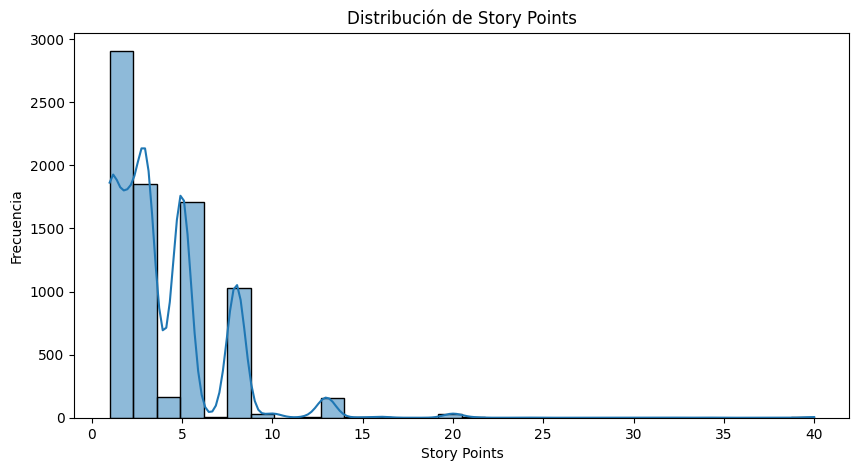

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# distribución de storypoint
plt.figure(figsize=(10, 5))
sns.histplot(train['storypoint'], bins=30, kde=True)
plt.title('Distribución de Story Points')
plt.xlabel('Story Points')
plt.ylabel('Frecuencia')
plt.show()

In [ ]:
# Creación de nuevas features: longitud de título y descripción
train['title_length'] = train['title'].apply(lambda x: len(x.split()))
train['description_length'] = train['description'].apply(lambda x: len(x.split()))

# Creación de nuevas features en test
test['title_length'] = test['title'].apply(lambda x: len(x.split()))
test['description_length'] = test['description'].apply(lambda x: len(x.split()))

print(train[['title_length', 'description_length']].describe())

       title_length  description_length
count   7900.000000         7900.000000
mean       8.778481           80.886582
std        4.108608          163.114426
min        1.000000            1.000000
25%        6.000000           26.000000
50%        8.000000           47.000000
75%       11.000000           85.000000
max       36.000000         2074.000000


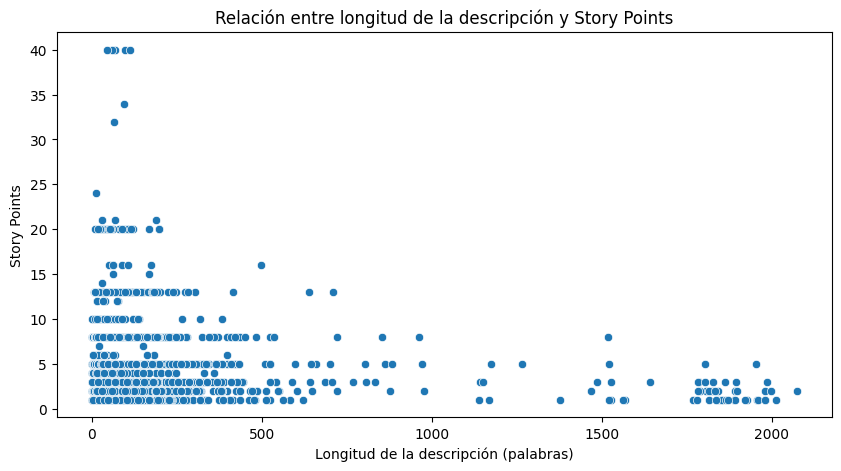

In [ ]:
# Gráfico de dispersión para longitud de descripción vs. storypoint
plt.figure(figsize=(10, 5))
sns.scatterplot(data=train, x='description_length', y='storypoint')
plt.title('Relación entre longitud de la descripción y Story Points')
plt.xlabel('Longitud de la descripción (palabras)')
plt.ylabel('Story Points')
plt.show()

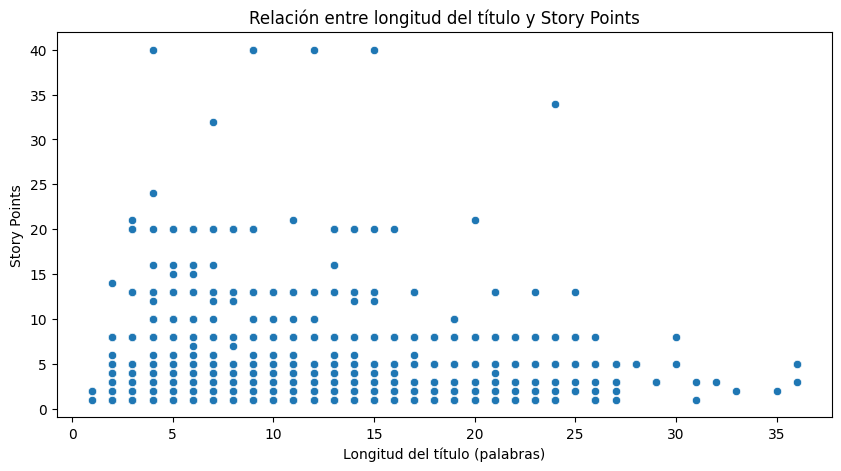

In [ ]:
# Gráfico de dispersión para longitud de título vs. storypoint
plt.figure(figsize=(10, 5))
sns.scatterplot(data=train, x='title_length', y='storypoint')
plt.title('Relación entre longitud del título y Story Points')
plt.xlabel('Longitud del título (palabras)')
plt.ylabel('Story Points')
plt.show()

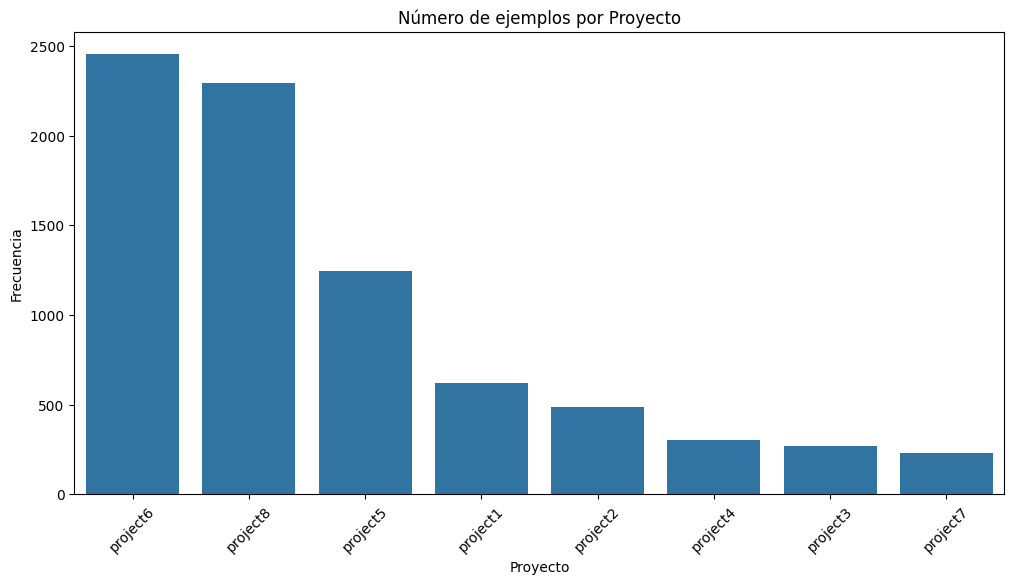

In [ ]:
# ejemplos por proyecto
plt.figure(figsize=(12, 6))
sns.countplot(data=train, x='project', order=train['project'].value_counts().index)
plt.title('Número de ejemplos por Proyecto')
plt.xlabel('Proyecto')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()

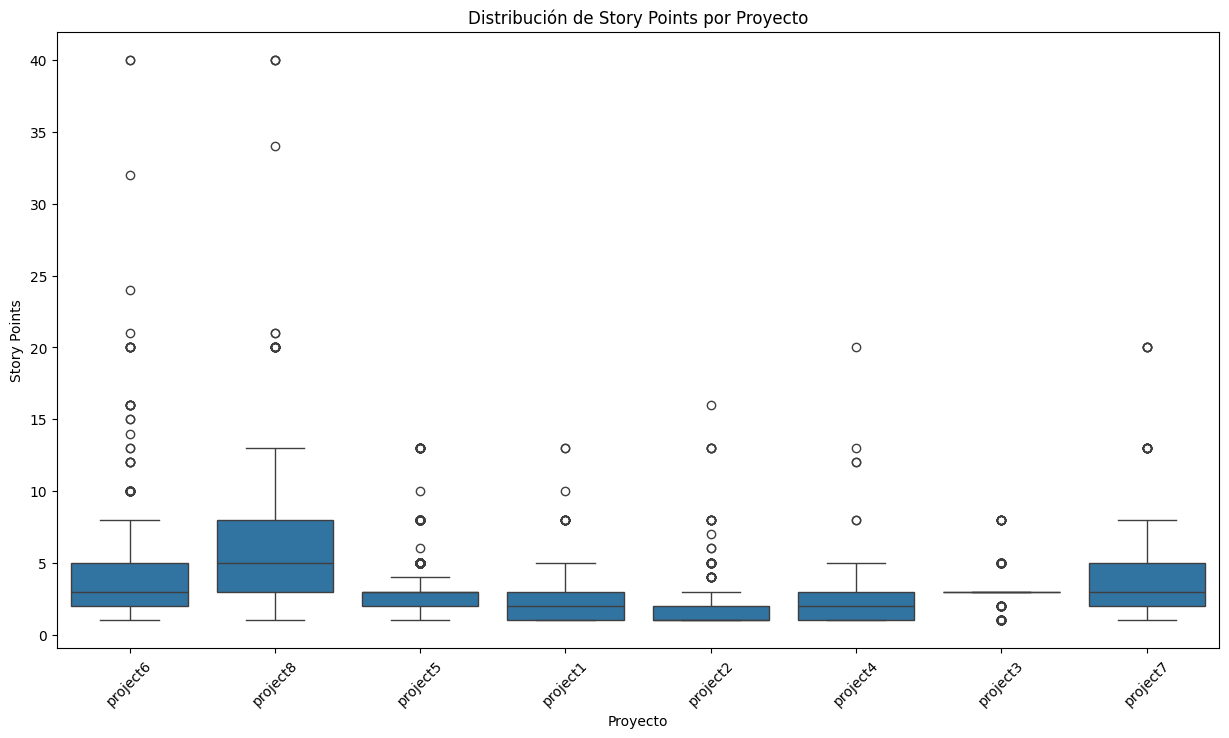

In [ ]:
# relación entre el proyecto y los story points
plt.figure(figsize=(15, 8))
sns.boxplot(data=train, x='project', y='storypoint', order=train['project'].value_counts().index)
plt.title('Distribución de Story Points por Proyecto')
plt.xlabel('Proyecto')
plt.ylabel('Story Points')
plt.xticks(rotation=45)
plt.show()

Decidimos aplicar One-Hot Encoding a la columna "project" ya que notamos cierta relación con el "Storypoint"

In [ ]:
# One-Hot Encoding a la columna 'project'
train = pd.get_dummies(train, columns=['project'], prefix='project')
test = pd.get_dummies(test, columns=['project'], prefix='project')

# Alinear columnas de train y test para asegurar consistencia
train, test = train.align(test, join='left', axis=1, fill_value=0)

In [ ]:
# Concatenar title y description
train['text'] = train['title'] + ' ' + train['description']
test['text'] = test['title'] + ' ' + test['description']

In [ ]:
train.head(5)

,id,title,description,storypoint,title_length,description_length,project_project1,project_project2,project_project3,project_project4,project_project5,project_project6,project_project7,project_project8,text
0,5660,Error enabling Appcelerator services during ap...,"When creating the default app, I encountered t...",3,7,27,False,False,False,False,False,False,False,True,Error enabling Appcelerator services during ap...
1,9014,Create a maintenance branch,"As a developer, I'd like to have a maintenance...",5,4,26,False,False,False,False,False,True,False,False,"Create a maintenance branch As a developer, I'..."
2,4094,Service Activity Monitoring Backend integrated...,SAM API used by SAM GUI,5,8,6,True,False,False,False,False,False,False,False,Service Activity Monitoring Backend integrated...
3,811,fs::enter(rootfs) does not work if 'rootfs' is...,I noticed this when I was testing the unified ...,2,9,81,False,False,False,False,True,False,False,False,fs::enter(rootfs) does not work if 'rootfs' is...
4,4459,transform processor with script option is broken,Creating the following stream throws exception...,2,7,52,False,False,False,False,False,True,False,False,transform processor with script option is brok...


In [ ]:
test.head(5)

,id,title,description,storypoint,title_length,description_length,project_project1,project_project2,project_project3,project_project4,project_project5,project_project6,project_project7,project_project8,text
0,3433,Add Run > Tizen Emulator menu action in App an...,The action will create the launch shortcut for...,0,12,40,False,False,False,False,False,False,False,True,Add Run > Tizen Emulator menu action in App an...
1,106,Chrome & IE mis-behavior,"On Wed, Aug 4, 2010 at 12:21 PM, Bryan Beecher...",0,4,124,False,True,False,False,False,False,False,False,"Chrome & IE mis-behavior On Wed, Aug 4, 2010 a..."
2,7182,Problems with Publishing routes (on release re...,I have a problem with publishing routes in Nex...,0,15,47,True,False,False,False,False,False,False,False,Problems with Publishing routes (on release re...
3,8985,Redis sink: better handling of module options/...,Please see the discussion here: https://githu...,0,8,6,False,False,False,False,False,True,False,False,Redis sink: better handling of module options/...
4,2149,java0.log generated by the SAM,"I found an issue on the TAC 5.2.1, a java0.log...",0,5,57,True,False,False,False,False,False,False,False,java0.log generated by the SAM I found an issu...


In [ ]:
test.shape

(1975, 15)

In [ ]:
train.shape

(7900, 15)

#Funciones Auxiliares

In [ ]:
# para convertir etiquetas gramaticales de POS a las de wordnet
def get_wordnet_pos(nltk_pos_tag):
    if nltk_pos_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_pos_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_pos_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [ ]:
# funcion de limpieza de texto
def clean_text(text):
    text = text.lower() # todo en minuscula
    text = re.sub(r'[^a-z\s]', '', text) # eliminar acentos y simbolos
    stop_words = set(stopwords.words('english'))
    text = " ".join([word for word in text.split() if word not in stop_words]) # eliminar stopwords
    return text

In [ ]:
stop_words = set(stopwords.words('english'))

lemmatizer = WordNetLemmatizer() # lematizar

# para limpiar el texto
def clean_text_lemattizer(text):
  text = text.lower()  # todo en minuscula
  text = re.sub(r'[^a-zA-Z\s]', '', text)  # eliminar acentos y simbolos
  tokens = text.split()  # dividir el texto en tokens

  # Filtrar tokens que son stop words o de longitud menor o igual a 2
  filtered_tokens = [word for word in tokens if word not in stop_words and len(word) > 2]

  # Etiquetar palabras con su POS
  tagged_tokens = pos_tag(filtered_tokens)

  # Lematizar los tokens filtrados
  lemmatized = [
      lemmatizer.lemmatize(word, get_wordnet_pos(pos))
      for word, pos in tagged_tokens
    ]

  return ' '.join(lemmatized).strip()

In [ ]:
from collections import Counter

# para obtener un vocabulario con una frecuencia mínima
def filter_by_min_freq(texts, min_freq=5):
    # contador de palabras
    word_counts = Counter(" ".join(texts).split())

    # Filtrar palabras que cumplen con la frecuencia mínima
    common_words = {word for word, count in word_counts.items() if count >= min_freq}

    # Función interna para filtrar palabras de un texto basado en el vocabulario
    def filter_text(text):
        return " ".join([word for word in text.split() if word in common_words])
    return texts.apply(filter_text)

In [ ]:
# para contar el número de palabras únicas en una columna de texto
def count_unique_words(column):
    unique_words = set(" ".join(column).split())
    return len(unique_words)

#Preprocesamiento del texto

In [ ]:
#Creo columna "clean_text" con texto con preprocesado básico
train['clean_text'] = train['text'].apply(clean_text)
test['clean_text'] = test['text'].apply(clean_text)

#Creo columna "lemmatized_text" con texto con procesamiento más complejo
train['lemmatized_text'] = train['text'].apply(clean_text_lemattizer)
test['lemmatized_text'] = test['text'].apply(clean_text_lemattizer)

In [ ]:
# Aplicar el filtro a la columna 'clean_text' con una frecuencia mínima de 5
train['clean_filtered_text'] = filter_by_min_freq(train['clean_text'], min_freq=5)
test['clean_filtered_text'] = filter_by_min_freq(test['clean_text'], min_freq=5)

print(train[['clean_filtered_text', 'clean_text']].head())

                                 clean_filtered_text  \
0  error enabling appcelerator services app creat...   
1  create maintenance branch developer id like ma...   
2  service activity monitoring backend integrated...   
3  work rootfs read noticed testing unified conta...   
4  transform processor script option broken creat...   

                                          clean_text  
0  error enabling appcelerator services app creat...  
1  create maintenance branch developer id like ma...  
2  service activity monitoring backend integrated...  
3  fsenterrootfs work rootfs read noticed testing...  
4  transform processor script option broken creat...  


In [ ]:
# Aplicar el filtro a la columna 'lemmatized_text' con una frecuencia mínima de 5
train['filtered_text'] = filter_by_min_freq(train['lemmatized_text'], min_freq=5)
test['filtered_text'] = filter_by_min_freq(test['lemmatized_text'], min_freq=5)

print(train[['lemmatized_text', 'filtered_text']].head())

                                     lemmatized_text  \
0  error enable appcelerator service app creation...   
1  create maintenance branch developer like maint...   
2  service activity monitor backend integrate sam...   
3  fsenterrootfs work rootfs read noticed test un...   
4  transform processor script option broken creat...   

                                       filtered_text  
0  error enable appcelerator service app creation...  
1  create maintenance branch developer like maint...  
2  service activity monitor backend integrate sam...  
3  work rootfs read noticed test unified containe...  
4  transform processor script option broken creat...  


In [ ]:
# Contar palabras únicas en ambas columnas
lemmatized_vocab_size = count_unique_words(train['lemmatized_text'])
filtered_vocab_size = count_unique_words(train['filtered_text'])

print(f"Número de palabras únicas en 'lemmatized_text': {lemmatized_vocab_size}")
print(f"Número de palabras únicas en 'filtered_text': {filtered_vocab_size}")

Número de palabras únicas en 'lemmatized_text': 31648
Número de palabras únicas en 'filtered_text': 5722


In [ ]:
# Contar palabras únicas en ambas columnas
clean_text_vocab_size = count_unique_words(train['clean_text'])
clean_filtered_vocab_size = count_unique_words(train['clean_filtered_text'])

print(f"Número de palabras únicas en 'clean_text': {clean_text_vocab_size}")
print(f"Número de palabras únicas en 'clean_filtered_text': {clean_filtered_vocab_size}")

Número de palabras únicas en 'clean_text': 33820
Número de palabras únicas en 'clean_filtered_text': 6933


Vemos el texto simplemente concatenado

In [ ]:
train['text'].tolist()[:3]

['Error enabling Appcelerator services during app creation When creating the default app, I encountered the error during enabling of appcelerator services. Please, see the attachment.    Note: I noticed Environment choice(screenshot), which is not working.',
 "Create a maintenance branch As a developer, I'd like to have a maintenance branch so that I can commit MINOR release _(ex: 1.0.2)_ code changes instead of committing to MASTER.",
 'Service Activity Monitoring Backend integrated in SAM Server SAM API used by SAM GUI']

El texto con un preprocesamiento básico

In [ ]:
train['clean_text'].tolist()[:3]

['error enabling appcelerator services app creation creating default app encountered error enabling appcelerator services please see attachment note noticed environment choicescreenshot working',
 'create maintenance branch developer id like maintenance branch commit minor release ex code changes instead committing master',
 'service activity monitoring backend integrated sam server sam api used sam gui']

Y con el preprocesamiento complejo

In [ ]:
train['lemmatized_text'].tolist()[:3]

['error enable appcelerator service app creation create default app encounter error enable appcelerator service please see attachment note notice environment choicescreenshot work',
 'create maintenance branch developer like maintenance branch commit minor release code change instead commit master',
 'service activity monitor backend integrate sam server sam api use sam gui']

In [ ]:
train['filtered_text'].tolist()[:3]

['error enable appcelerator service app creation create default app encounter error enable appcelerator service please see attachment note notice environment work',
 'create maintenance branch developer like maintenance branch commit minor release code change instead commit master',
 'service activity monitor backend integrate sam server sam api use sam gui']

In [ ]:
train['clean_filtered_text'].tolist()[:3]

['error enabling appcelerator services app creation creating default app encountered error enabling appcelerator services please see attachment note noticed environment working',
 'create maintenance branch developer id like maintenance branch commit minor release ex code changes instead master',
 'service activity monitoring backend integrated sam server sam api used sam gui']

# Bayes Naïve

Tras probar los diversos preprocesamientos del texto, nos decidimos por la opción básica. Por eso utilizamos la columna "clean_filtered_text". Esto lo justificamos en el final de la sección.

In [ ]:
# Dividir el dataset en entrenamiento y prueba (80% - 20%)
X_train, X_test, y_train, y_test = train_test_split(
    train['clean_filtered_text'], train['storypoint'], test_size=0.2, random_state=42)

print(f"Tamaño del conjunto de entrenamiento: {len(X_train)}")
print(f"Tamaño del conjunto de prueba: {len(X_test)}")

Tamaño del conjunto de entrenamiento: 6320
Tamaño del conjunto de prueba: 1580


Probamos primero con Bag of Words, vemos que los resultados podrían ser mejores y optamos por implementar otro método

In [ ]:
# Bag of Words
vectorizer_bow = CountVectorizer(max_features=2000)  # Puedes ajustar max_features
X_train_vec_bow = vectorizer_bow.fit_transform(X_train)
X_test_vec_bow = vectorizer_bow.transform(X_test)

# Inicializar el modelo Naive Bayes
nb_model = MultinomialNB()

# Definir los hiperparámetros para la búsqueda
param_grid = {
    'alpha': [0.1, 1, 5, 10, 20, 30, 50],
    'fit_prior': [True, False],
    'class_prior': [None]
}
grid_search = GridSearchCV(nb_model, param_grid, cv=10)

# Ajustar el modelo
grid_search.fit(X_train_vec_bow, y_train)

# Mejor hiperparámetro
best_alpha = grid_search.best_params_
print(f"Mejor hiperparametros: {best_alpha}")

# Predicciones con Bag of Words (BoW)
y_pred_bow = grid_search.predict(X_test_vec_bow)
mse_bow = mean_squared_error(y_test, y_pred_bow)
rmse_bow = np.sqrt(mse_bow)
print(f"Error cuadrático medio (Validación - BoW): {mse_bow}")
print(f"RMSE (Validación - BoW): {rmse_bow}")

# Predicciones en el conjunto de entrenamiento
y_pred_train_bow = grid_search.predict(X_train_vec_bow)

# Cálculo de métricas para el conjunto de entrenamiento
mse_train_bow = mean_squared_error(y_train, y_pred_train_bow)
rmse_train_bow = np.sqrt(mse_train_bow)
print(f"Error cuadrático medio (Entrenamiento - BoW): {mse_train_bow}")
print(f"RMSE (Entrenamiento - BoW): {rmse_train_bow}")

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


Mejor hiperparametros: {'alpha': 20, 'class_prior': None, 'fit_prior': True}
Error cuadrático medio (Validación - BoW): 8.570886075949367
RMSE (Validación - BoW): 2.9276075686384893
Error cuadrático medio (Entrenamiento - BoW): 8.926582278481012
RMSE (Entrenamiento - BoW): 2.9877386563220374


- Mejor hiperparametros: {'alpha': 20, 'class_prior': None, 'fit_prior': True}
- Error cuadrático medio (Validación - BoW): 8.570886075949367
- RMSE (Validación - BoW): 2.9276075686384893
- Error cuadrático medio (Entrenamiento - BoW): 8.926582278481012
- RMSE (Entrenamiento - BoW): 2.9877386563220374

Implementamos TfidfVectorizer: Calcula el valor TF-IDF para cada palabra en el conjunto de documentos. TF-IDF es una medida que representa la importancia de una palabra en un documento en relación con su aparición en el resto de documentos.

In [ ]:
vectorizer = TfidfVectorizer(max_features=2000, ngram_range=(1, 3))
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

test_vec = vectorizer.transform(test['clean_filtered_text'])

nb_model = MultinomialNB()
param_grid = {
    'alpha': [0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 5.0, 10.0, 20.0, 50.0],
    'fit_prior': [True, False]
}

grid_search = GridSearchCV(nb_model, param_grid, scoring='neg_mean_squared_error', cv=10)
grid_search.fit(X_train_vec, y_train)
best_params = grid_search.best_params_
best_alpha = best_params['alpha']
best_fit_prior = best_params['fit_prior']
print("Mejor valor de alpha:", best_alpha)
print("Mejor valor de fit_prior:", best_fit_prior)

nb_model_best = MultinomialNB(alpha=best_alpha, fit_prior=best_fit_prior)
nb_model_best.fit(X_train_vec, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = nb_model_best.predict(X_test_vec)

# Calcular el error
mse = mean_squared_error(y_test, y_pred)
print(f"Error cuadrático medio (Validación TFID): {mse}")
rmse = np.sqrt(mse)
print(f"RMSE (Validación TFID): {rmse}")

# Predicciones en el conjunto de entrenamiento
y_pred_train = nb_model_best.predict(X_train_vec)

# Calcular el error en el conjunto de entrenamiento
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)
print(f"Error cuadrático medio (Entrenamiento TFID): {mse_train}")
print(f"RMSE (Entrenamiento TFID): {rmse_train}")

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


Mejor valor de alpha: 20.0
Mejor valor de fit_prior: True
Error cuadrático medio (Validación TFID): 7.166455696202532
RMSE (Validación TFID): 2.6770236637360028
Error cuadrático medio (Entrenamiento TFID): 8.478006329113924
RMSE (Entrenamiento TFID): 2.911701620893515


- Error cuadrático medio (Validación TFID): 7.166455696202532
- RMSE (Validación TFID): 2.6770236637360028
- Error cuadrático medio (Entrenamiento TFID): 8.478006329113924
- RMSE (Entrenamiento TFID): 2.911701620893515

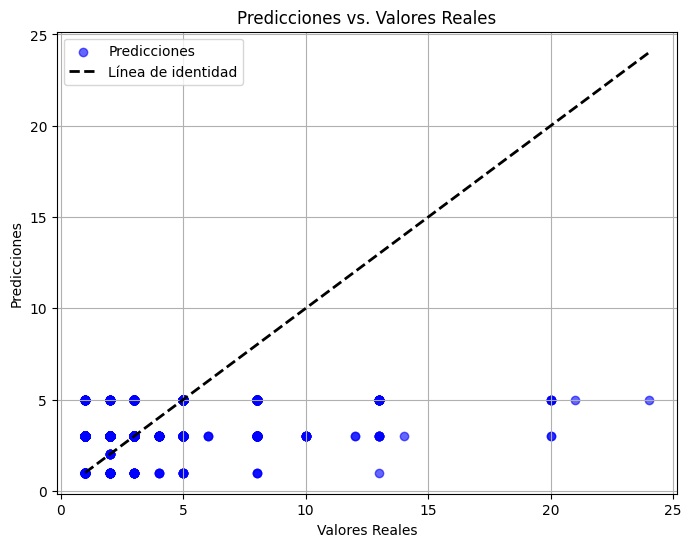

In [ ]:
# Gráfico Predicciones vs. Valores Reales
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='b', label='Predicciones')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Línea de identidad')
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.title("Predicciones vs. Valores Reales")
plt.legend()
plt.grid(True)
plt.show()

Probamos el modelo de Bayes Naive con el texto concatenado, nos dio resultados:

**Bag of Words**
- Error cuadrático medio (BoW): 9.918354430379747
- RMSE (BoW): 3.1493419043317203

**TfidfVectorizer**
- Error cuadrático: 7.30126582278481
- RMSE: 2.702085458083221

Luego con el preprocesamiento básico obtuvimos los resultados:

**Bag of Words**
- Error cuadrático medio (BoW): 8.549367088607594
- RMSE (BoW): 2.923930075875207

**TfidfVectorizer**
- Error cuadrático medio: 7.1689873417721515
- RMSE: 2.6774964690494274

Agregando al preprocesamiento, lemmatización y tokenización:

**Bag of Words**
- Error cuadrático medio (BoW): 8.727215189873418
- RMSE (BoW): 2.954186045237066

**TfidfVectorizer**
- Error cuadrático: 7.209493670886076
- RMSE: 2.685050031356227

Determinamos que la técnica que mejor resultados dio fue TfidfVectorizer con preprocesamiento básico, investigando supimos que Bayes Naive asume una independencia condicional entre las características. La lematización puede crear características demasiado generales (por ejemplo, "running" y "run" se agrupan en una sola palabra), lo cual puede reducir la especificidad, por lo que en este caso no fue útil, pero podría ser más efectiva en otros modelos.

Por último, decidimos probar eliminar las palabras menos frecuentes, en el texto con procesamiento básico, los resultados fueron mejores:

**Bag of Words**

- Error cuadrático medio (BoW): 8.570886075949367
- RMSE (BoW): 2.9276075686384893


**TfidfVectorizer**
- Error cuadrático medio en el conjunto de validación: 7.166455696202532
- RMSE en el conjunto de validación: 2.6770236637360028

Siendo esta último, el mejor resultado obtenido hasta ahora.

Por último, quisimos entrenar el modelo Bayes Naive, utilizando también las nuevas columnas generadas en el análisis exploratorio.

In [ ]:
# Dividir el dataset en entrenamiento y prueba (80% - 20%)
X_train, X_test, y_train, y_test = train_test_split(
    train['clean_filtered_text'], train['storypoint'], test_size=0.2, random_state=42)

print(f"Tamaño del conjunto de entrenamiento: {len(X_train)}")
print(f"Tamaño del conjunto de prueba: {len(X_test)}")

Tamaño del conjunto de entrenamiento: 6320
Tamaño del conjunto de prueba: 1580


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import numpy as np

X_train_df = pd.DataFrame({
    'filtered_text': X_train,
    'title_length': train['title_length'].iloc[X_train.index],
    'description_length': train['description_length'].iloc[X_train.index],
    **{f'project_project{i}': train[f'project_project{i}'].iloc[X_train.index] for i in range(1, 9)}
})

X_test_df = pd.DataFrame({
    'filtered_text': X_test,
    'title_length': train['title_length'].iloc[X_test.index],
    'description_length': train['description_length'].iloc[X_test.index],
    **{f'project_project{i}': train[f'project_project{i}'].iloc[X_test.index] for i in range(1, 9)}
})

X_train = X_train_df
X_test = X_test_df

project_columns = [f'project_project{i}' for i in range(1, 9)]

text_transformer = TfidfVectorizer(max_features=2000, ngram_range=(1, 3))

numeric_transformer = MinMaxScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ('text', text_transformer, 'filtered_text'),
        ('num', numeric_transformer, ['title_length', 'description_length']),
        ('project', 'passthrough', project_columns)
    ])

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('nb', MultinomialNB())
])

param_grid = {
    'nb__alpha': [0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 5.0, 10.0, 20.0, 50.0],
    'nb__fit_prior': [True, False]
}

grid_search = GridSearchCV(pipeline, param_grid, scoring='neg_mean_squared_error', cv=10)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Mejor valor de alpha:", best_params['nb__alpha'])
print("Mejor valor de fit_prior:", best_params['nb__fit_prior'])

best_model = grid_search.best_estimator_

y_pred_train = best_model.predict(X_train)

mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)
print(f"Error cuadrático medio en el conjunto de entrenamiento: {mse_train}")
print(f"RMSE en el conjunto de entrenamiento: {rmse_train}")

y_pred = best_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Error cuadrático medio en el conjunto de validación: {mse}")
print(f"RMSE en el conjunto de validación: {rmse}")

X_test_final = test[['filtered_text', 'title_length', 'description_length'] + project_columns]

test_predictions = best_model.predict(X_test_final)

submission = pd.DataFrame({
    'id': test['id'],
    'storypoint': test_predictions
})

submission.to_csv('submission_nb.csv', index=False)
from google.colab import files
files.download('submission_nb.csv')

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


Mejor valor de alpha: 50.0
Mejor valor de fit_prior: True
Error cuadrático medio en el conjunto de entrenamiento: 8.331170886075949
RMSE en el conjunto de entrenamiento: 2.8863767747949933
Error cuadrático medio en el conjunto de validación: 7.0329113924050635
RMSE en el conjunto de validación: 2.6519636861022557


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Los resultados del modelo Bayes Naive, utilizando las nuevas columnas nos dieron:

- Error cuadrático medio en el conjunto de entrenamiento: 8.331170886075949
- RMSE en el conjunto de entrenamiento: 2.8863767747949933

- Error cuadrático medio en el conjunto de validación: 7.0329113924050635
- RMSE en el conjunto de validación: 2.6519636861022557

Este es superador a los obtenidos anteriormente, por lo que creemos es positivo sumar información extra al texto.

##Descarga del Bayes Naive

In [ ]:
test_predictions = nb_model_best.predict(test_vec)

In [ ]:
submission = pd.DataFrame({
    'id': test['id'],
    'storypoint': test_predictions
})

submission.to_csv('submission.csv', index=False)

In [ ]:
from google.colab import files
files.download('submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

En un principio decidimos usar la columna 'lemmatized_text', ya que según nuestra investigación, usar texto lematizado es generalmente mejor para modelos como Random Forest y XGBoost, ya que reduce la dimensionalidad y el ruido, permitiendo que los modelos se concentren en patrones más relevantes y robustos en los datos.

Luego decidimos utilizar 'filtered_text' que sobre el texto lematizado, filtra las palabras con menor frecuencia, al final de la sección analizamos los resultados.

In [ ]:
# Dividir el dataset en entrenamiento y prueba (80% - 20%)
X_train, X_test, y_train, y_test = train_test_split(
    train['lemmatized_text'], train['storypoint'], test_size=0.2, random_state=42)

print(f"Tamaño del conjunto de entrenamiento: {len(X_train)}")
print(f"Tamaño del conjunto de prueba: {len(X_test)}")

Tamaño del conjunto de entrenamiento: 6320
Tamaño del conjunto de prueba: 1580


In [ ]:
# Vectorización de texto con TF-IDF
vectorizer = TfidfVectorizer(max_features=2000, ngram_range=(1, 3))
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

test_vec = vectorizer.transform(test['lemmatized_text'])

rf_model = RandomForestRegressor()

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'oob_score': [True]
}

grid_search = GridSearchCV(rf_model, param_grid, scoring='neg_mean_squared_error', cv=10, n_jobs=-1)
grid_search.fit(X_train_vec, y_train)

best_params = grid_search.best_params_
print("Mejores hiperparámetros:", best_params)

rf_model_best = RandomForestRegressor(**best_params)
rf_model_best.fit(X_train_vec, y_train)

y_train_pred = rf_model_best.predict(X_train_vec)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
print(f"Error cuadrático medio (Entrenamiento): {mse_train}")
print(f"RMSE (Entrenamiento): {rmse_train}")

y_pred = rf_model_best.predict(X_test_vec)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Error cuadrático medio (Validación): {mse}")
print(f"RMSE (Validación): {rmse}")

Mejores hiperparámetros: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200, 'oob_score': True}
Error cuadrático medio (Entrenamiento): 1.719104799790729
RMSE (Entrenamiento): 1.3111463685610119
Error cuadrático medio (Validación): 5.884323371556008
RMSE (Validación): 2.425762430980414


Los resultados que obtuvimos con 'lemmatized_text' fueron:

- Mejores hiperparámetros: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200, 'oob_score': True}
- Error cuadrático medio (Entrenamiento): 1.719104799790729
- RMSE (Entrenamiento): 1.3111463685610119
- Error cuadrático medio (Validación): 5.884323371556008
- RMSE (Validación): 2.425762430980414

Los resultados que obtuvimos con 'filtered_text' fueron:

- Mejores hiperparámetros: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
- Error cuadrático medio (Entrenamiento): 1.7047685723836672
- RMSE (Entrenamiento): 1.3056678644983444
- Error cuadrático medio (Validación): 5.939090321425357
- RMSE (Validación): 2.4370248914250663

El resultado obtenido sugiere que el filtrado realizado en filtered_text pudo haber eliminado características que eran útiles para el modelo. La lematización en sí ayuda a reducir la dimensionalidad de forma controlada, pero al combinarla con un filtrado de palabras basado en frecuencia,  puede que se pierdan palabras clave que interactúan con otras características.

Random Forest agregando las features nuevas al entrenamiento

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
project_columns = [f'project_project{i}' for i in range(1, 9)]  # Las columnas 'project_project1' a 'project_project8'

In [ ]:
# Dividir el dataset en entrenamiento y prueba (80% - 20%)
X_train, X_test, y_train, y_test = train_test_split(
    train[['lemmatized_text', 'title_length', 'description_length'] + project_columns],
    train['storypoint'],
    test_size=0.2,
    random_state=42
)

text_transformer = TfidfVectorizer(max_features=2000, ngram_range=(1, 3))

numeric_transformer = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ('text', text_transformer, 'lemmatized_text'),
        ('num', numeric_transformer, ['title_length', 'description_length']),
        ('project', 'passthrough', project_columns)
    ])

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor())
])

param_grid = {
    'regressor__n_estimators': [50, 100, 150],
    'regressor__max_depth': [5, 10, 20],
    'regressor__min_samples_split': [10, 20, 50],
    'regressor__min_samples_leaf': [2, 4, 6],
    'regressor__max_features': ['sqrt', 'log2']
}

grid_search = GridSearchCV(pipeline, param_grid, cv=10, n_jobs=-1, scoring='neg_mean_squared_error')

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Mejores hiperparámetros:", best_params)

best_model = grid_search.best_estimator_

y_pred_train = best_model.predict(X_train)

mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

print(f"Error cuadrático medio (Entrenamiento): {mse_train}")
print(f"RMSE (Entrenamiento): {rmse_train}")
print(f"MAE (Entrenamiento): {mae_train}")
print(f"R² (Entrenamiento): {r2_train}")

y_pred_test = best_model.predict(X_test)

mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print(f"Error cuadrático medio (Prueba): {mse_test}")
print(f"RMSE (Prueba): {rmse_test}")
print(f"MAE (Prueba): {mae_test}")
print(f"R² (Prueba): {r2_test}")

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Mejores hiperparámetros: {'regressor__max_depth': 20, 'regressor__max_features': 'sqrt', 'regressor__min_samples_leaf': 2, 'regressor__min_samples_split': 10, 'regressor__n_estimators': 100}
Error cuadrático medio (Entrenamiento): 5.608645221492051
RMSE (Entrenamiento): 2.368257845229706
MAE (Entrenamiento): 1.6456901763591296
R² (Entrenamiento): 0.4027301007422831
Error cuadrático medio (Prueba): 6.272358811034276
RMSE (Prueba): 2.5044677700130773
MAE (Prueba): 1.7722765369284061
R² (Prueba): 0.24045374060646996


Los resultados del entrenamiento de Random Forest, utilizando las nuevas columnas fueron:

**Con "lemmatized_text":**

- Mejores hiperparámetros: {'regressor__max_depth': 20, 'regressor__max_features': 'sqrt', 'regressor__min_samples_leaf': 2, 'regressor__min_samples_split': 10, 'regressor__n_estimators': 100}
- Error cuadrático medio (Entrenamiento): 5.63910193327332
- RMSE (Entrenamiento): 2.3746793327254356

- Error cuadrático medio (Prueba): 6.248434392553669
- RMSE (Prueba): 2.4996868588992642

**Con "filtered_text":**

- Mejores hiperparámetros: {'regressor__max_depth': 20, 'regressor__max_features': 'sqrt', 'regressor__min_samples_leaf': 2, 'regressor__min_samples_split': 20, 'regressor__n_estimators': 150}
- Error cuadrático medio (Entrenamiento): 5.798298628593582
- RMSE (Entrenamiento): 2.407965661838553

- Error cuadrático medio (Prueba): 6.290244255419674
- RMSE (Prueba): 2.508035935830999


In [ ]:
X_test_final = test[['lemmatized_text', 'title_length', 'description_length'] + project_columns]

test_predictions = best_model.predict(X_test_final)

submission = pd.DataFrame({
    'id': test['id'],
    'storypoint': test_predictions
})

submission.to_csv('submissionrfplus.csv', index=False)

from google.colab import files
files.download('submissionrfplus.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##Descarga de Random Forest

In [ ]:
test_predictions = rf_model_best.predict(test_vec)

submission = pd.DataFrame({
    'id': test['id'],
    'storypoint': test_predictions
})

submission.to_csv('submissionrf.csv', index=False)

from google.colab import files
files.download('submissionrf.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# XGboost

Similar al modelo anterior, probamos los resultados de las columnas 'lemmatized_test' y 'filtered_text'

In [ ]:
# Dividir el dataset en entrenamiento y prueba (80% - 20%)
X_train, X_test, y_train, y_test = train_test_split(
    train['lemmatized_text'], train['storypoint'], test_size=0.2, random_state=42)

print(f"Tamaño del conjunto de entrenamiento: {len(X_train)}")
print(f"Tamaño del conjunto de prueba: {len(X_test)}")

Tamaño del conjunto de entrenamiento: 6320
Tamaño del conjunto de prueba: 1580


In [ ]:
# Vectorización de texto con TF-IDF
vectorizer = TfidfVectorizer(max_features=2000, ngram_range=(1, 3))
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

test_vec = vectorizer.transform(test['lemmatized_text'])

In [ ]:
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0]
}

grid_search_xgb = GridSearchCV(xgb_model, param_grid_xgb, scoring='neg_mean_squared_error', cv=10)
grid_search_xgb.fit(X_train_vec, y_train)

best_params_xgb = grid_search_xgb.best_params_
print("Mejores parámetros de XGBoost:", best_params_xgb)

xgb_model_best = xgb.XGBRegressor(**best_params_xgb, objective='reg:squarederror', random_state=42)
xgb_model_best.fit(X_train_vec, y_train)

y_train_pred_xgb = xgb_model_best.predict(X_train_vec)
mse_train_xgb = mean_squared_error(y_train, y_train_pred_xgb)
rmse_train_xgb = np.sqrt(mse_train_xgb)
print(f"Error cuadrático medio (Entrenamiento): {mse_train_xgb}")
print(f"RMSE (Entrenamiento): {rmse_train_xgb}")

y_pred_xgb = xgb_model_best.predict(X_test_vec)

mse_test_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_test_xgb = np.sqrt(mse_test_xgb)
print(f"Error cuadrático medio (Validación): {mse_test_xgb}")
print(f"RMSE (Validación): {rmse_test_xgb}")

Mejores parámetros de XGBoost: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}
Error cuadrático medio (Entrenamiento): 1.9978649640112491
RMSE (Entrenamiento): 1.4134585115988545
Error cuadrático medio (Validación): 6.02053165468033
RMSE (Validación): 2.453677170020606


Con la columna 'filtered_text':

- Mejores parámetros de XGBoost: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 1.0}
- Error cuadrático medio (Entrenamiento): 3.068234747859882
- RMSE (Entrenamiento): 1.7516377330543784
- Error cuadrático medio (Validación): 6.019436694201848
- RMSE (Validación): 2.453454033439764

Los resultados que obtuvimos con 'lemmatized_text' fueron:
- Mejores parámetros de XGBoost: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}
- Error cuadrático medio (Entrenamiento): 1.9978649640112491
- RMSE (Entrenamiento): 1.4134585115988545
- Error cuadrático medio (Validación): 6.02053165468033
- RMSE (Validación): 2.453677170020606

Usando las nuevas columnas:

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import numpy as np

project_columns = [f'project_project{i}' for i in range(1, 9)]  # Las columnas 'project_project1' a 'project_project8'

X_train, X_test, y_train, y_test = train_test_split(
    train[['lemmatized_text', 'title_length', 'description_length'] + project_columns],
    train['storypoint'],
    test_size=0.2,
    random_state=42
)

text_transformer = TfidfVectorizer(max_features=2000, ngram_range=(1, 3))
numeric_transformer = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ('text', text_transformer, 'lemmatized_text'),
        ('num', numeric_transformer, ['title_length', 'description_length']),
        ('project', 'passthrough', project_columns)
    ]
)

xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', xgb_model)])

# Definir el grid de hiperparámetros
param_grid_xgb = {
    'model__n_estimators': [50, 100, 200],
    'model__max_depth': [3, 5, 7, 10],
    'model__learning_rate': [0.01, 0.1, 0.2],
    'model__subsample': [0.8, 1.0]
}

grid_search_xgb = GridSearchCV(pipeline, param_grid_xgb, scoring='neg_mean_squared_error', cv=10)
grid_search_xgb.fit(X_train, y_train)

best_params_xgb = grid_search_xgb.best_params_
print("Mejores parámetros de XGBoost:", best_params_xgb)

pipeline.set_params(**grid_search_xgb.best_params_)
pipeline.fit(X_train, y_train)

y_train_pred_xgb = pipeline.predict(X_train)
mse_train_xgb = mean_squared_error(y_train, y_train_pred_xgb)
rmse_train_xgb = np.sqrt(mse_train_xgb)
print(f"Error cuadrático medio (Entrenamiento): {mse_train_xgb}")
print(f"RMSE (Entrenamiento): {rmse_train_xgb}")

y_pred_xgb = pipeline.predict(X_test)

mse_test_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_test_xgb = np.sqrt(mse_test_xgb)
print(f"Error cuadrático medio (Validación): {mse_test_xgb}")
print(f"RMSE (Validación): {rmse_test_xgb}")

(lo corrimos mas de 12 hs y no terminaba nunca pq se nos cortaba el colab, lo dejamos para mostrar el codigo)

##Descarga de XGBoost

In [ ]:
test_predictions = xgb_model_best.predict(test_vec)

submission = pd.DataFrame({
    'id': test['id'],
    'storypoint': test_predictions
})

submission.to_csv('submissionxgb.csv', index=False)

from google.colab import files
files.download('submissionxgb.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Un modelo de red neuronal aplicando Keras y Tensor Flow.

In [ ]:
# Importar librerías necesarias
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import tensorflow as tf
import random
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
import matplotlib.pyplot as plt

##TfidfVectorizer

In [ ]:
seed_value = 42
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

X_train, X_test, y_train, y_test = train_test_split(
    train['clean_text'], train['storypoint'], test_size=0.2, random_state=seed_value)

vectorizer_tfidf = TfidfVectorizer(max_features=2000)
X_train_tfidf = vectorizer_tfidf.fit_transform(X_train)
X_test_tfidf = vectorizer_tfidf.transform(X_test)

model = Sequential()

model.add(Dense(256, input_dim=X_train_tfidf.shape[1], activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(1, activation='linear'))

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mean_squared_error'])

model.summary()

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-5)
checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True)

history = model.fit(X_train_tfidf, y_train, epochs=50, batch_size=32, validation_data=(X_test_tfidf, y_test),
                    callbacks=[early_stopping, reduce_lr, checkpoint])

loss_test, mse_test = model.evaluate(X_test_tfidf, y_test)
rmse_test = mse_test ** 0.5

print(f"Error cuadrático medio (MSE) en prueba: {mse_test}")
print(f"Raíz del error cuadrático medio (RMSE) en prueba: {rmse_test}")

loss_train, mse_train = model.evaluate(X_train_tfidf, y_train)
rmse_train = mse_train ** 0.5

print(f"Error cuadrático medio (MSE) en entrenamiento: {mse_train}")
print(f"Raíz del error cuadrático medio (RMSE) en entrenamiento: {rmse_train}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                     │ (None, 256)                 │         512,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 545,281 (2.08 MB)

 Trainable params: 545,281 (2.08 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
198/198 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - loss: 19.0390 - mean_squared_error: 15.8979 - val_loss: 7.8454 - val_mean_squared_error: 6.2674 - learning_rate: 0.0010
Epoch 2/50
198/198 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 9.9193 - mean_squared_error: 8.3784 - val_loss: 7.6544 - val_mean_squared_error: 6.1759 - learning_rate: 0.0010
Epoch 3/50
198/198 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 9.4182 - mean_squared_error: 7.9204 - val_loss: 7.7963 - val_mean_squared_error: 6.2984 - learning_rate: 0.0010
Epoch 4/50
198/198 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 9.1770 - mean_squared_error: 7.6442 - val_loss: 7.8186 - val_mean_squared_error: 6.2790 - learning_rate: 0.0010
Epoch 5/50
198/198 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 9.0140 - mean_squared_error: 7.4375 - val_loss: 7.9153 - val_mean_squared_error: 6.3050 - learning_rate: 0.0010
Epoch 6/50
198/198 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 8.7701 - mean_squared_error: 7.1124 - val_loss: 7.9991 - val_mean_square

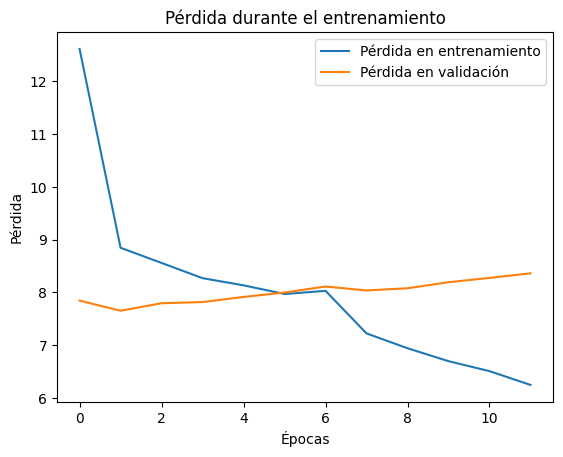

In [ ]:
import matplotlib.pyplot as plt

# Graficar la pérdida (loss) durante el entrenamiento
plt.plot(history.history['loss'], label='Pérdida en entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida en validación')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

Probamos el modelo de Redes Neuronales con el texto concatenado, "text" nos dio resultados:

**TfidfVectorizer**
- Error cuadrático medio (MSE Validación): 6.220636367797852
- Raíz del error cuadrático medio (RMSE Validación) en prueba: 2.4941203595251475

- Error cuadrático medio (MSE Entrenamiento): 6.299950122833252
- Raíz del error cuadrático medio (RMSE Entrenamiento): 2.5099701438131197

Luego con el preprocesamiento básico, "clean_text" obtuvimos los resultados:

**TfidfVectorizer**

- Error cuadrático medio (MSE Validación): 6.175868511199951
- Raíz del error cuadrático medio (RMSE Validación): 2.4851294757416467

- Error cuadrático medio (MSE Entrenamiento): 6.158326148986816
- Raíz del error cuadrático medio (RMSE Entrenamiento): 2.481597499391635

Agregando al preprocesamiento, lemmatización y tokenización, con "lemmatized_text":

**TfidfVectorizer**

- Error cuadrático medio (MSE Validación): 6.19241189956665
- Raíz del error cuadrático medio (RMSE Validación): 2.4884557258602475

- Error cuadrático medio (MSE Entrenamiento): 6.22749662399292
- Raíz del error cuadrático medio (RMSE Entrenamiento): 2.4954952662733945

Con "filtered_tex", que es "lemmatized_text" pero filtrada por mínima frecuencia:

- Error cuadrático medio (MSE Validación): 6.199394702911377
- Raíz del error cuadrático medio (RMSE Validación): 2.4898583700506696

- Error cuadrático medio (MSE Entrenamiento): 6.237082004547119
- Raíz del error cuadrático medio (RMSE Entrenamiento): 2.497415064531148

Por último con "clean_filtered_text" es decir el filtrado sobre "clean_text":

- Error cuadrático medio (MSE Validación): 6.182759761810303
- Raíz del error cuadrático medio (RMSE Validación): 2.4865155864804676

- Error cuadrático medio (MSE Entrenamiento): 6.163732051849365
- Raíz del error cuadrático medio (RMSE Entrenamiento): 2.4826864586268975

Vemos que los resultados son mejores en el caso de los datos preprocesados con procesamientos básicos, investigando determinamos:

Las redes neuronales tienen la capacidad de aprender representaciones complejas y capturar dependencias no lineales entre las características. Al simplificar el texto mediante preprocesamiento, se reduce la cantidad de datos que la red puede usar para aprender estos patrones complejos. Por lo tanto, el modelo podría desempeñarse mejor con datos menos procesados donde tiene más contexto para analizar.

##Word2Vec

Probamos implementando Word2Vec: cada palabra en el texto se representa mediante un vector denso que captura su significado semántico y la relación con otras palabras

In [ ]:
from gensim.models import Word2Vec
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
import tensorflow as tf

In [ ]:
seed_value = 42
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

X_train, X_test, y_train, y_test = train_test_split(
    train['lemmatized_text'], train['storypoint'], test_size=0.2, random_state=seed_value)

sentences = [text.split() for text in X_train]
word2vec_model = Word2Vec(sentences, vector_size=200, window=5, min_count=1, workers=4, seed=seed_value)

def document_vector(doc, model):
    words = doc.split()
    word_vecs = [model.wv[word] for word in words if word in model.wv]
    return np.mean(word_vecs, axis=0) if word_vecs else np.zeros(model.vector_size)

X_train_vec = np.array([document_vector(text, word2vec_model) for text in X_train])
X_test_vec = np.array([document_vector(text, word2vec_model) for text in X_test])


model = Sequential()
model.add(Dense(256, input_dim=X_train_vec.shape[1], activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(1, activation='linear'))

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mean_squared_error'])

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-5)
checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True)

history = model.fit(X_train_vec, y_train, epochs=50, batch_size=32, validation_data=(X_test_vec, y_test),
                    callbacks=[early_stopping, reduce_lr, checkpoint])

loss_test, mse_test = model.evaluate(X_test_vec, y_test)
rmse_test = mse_test ** 0.5

print(f"Error cuadrático medio (MSE) en prueba: {mse_test}")
print(f"Raíz del error cuadrático medio (RMSE) en prueba: {rmse_test}")

loss_train, mse_train = model.evaluate(X_train_vec, y_train)
rmse_train = mse_train ** 0.5

print(f"Error cuadrático medio (MSE) en entrenamiento: {mse_train}")
print(f"Raíz del error cuadrático medio (RMSE) en entrenamiento: {rmse_train}")

Epoch 1/50
198/198 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 16.8048 - mean_squared_error: 13.8288 - val_loss: 9.6376 - val_mean_squared_error: 7.8981 - learning_rate: 0.0010
Epoch 2/50
198/198 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 12.3213 - mean_squared_error: 10.7327 - val_loss: 9.0304 - val_mean_squared_error: 7.8028 - learning_rate: 0.0010
Epoch 3/50
198/198 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 11.8690 - mean_squared_error: 10.7226 - val_loss: 8.8536 - val_mean_squared_error: 7.9182 - learning_rate: 0.0010
Epoch 4/50
198/198 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 11.3958 - mean_squared_error: 10.5076 - val_loss: 8.4853 - val_mean_squared_error: 7.7388 - learning_rate: 0.0010
Epoch 5/50
198/198 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 11.1993 - mean_squared_error: 10.4865 - val_loss: 8.4374 - val_mean_squared_error: 7.8289 - learning_rate: 0.0010
Epoch 6/50
198/198 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 11.1290 - mean_squared_error: 10.5447 - val_loss: 8.3315 - val_mean_sq

Resultados de columna "clean_text":

- Error cuadrático medio (MSE) en prueba: 7.479933261871338
- Raíz del error cuadrático medio (RMSE) en prueba: 2.7349466652699714

- Error cuadrático medio (MSE) en entrenamiento: 8.676304817199707
- Raíz del error cuadrático medio (RMSE) en entrenamiento: 2.9455567923908217


"clean_filtered_text":

- Error cuadrático medio (MSE) en prueba: 7.316233158111572
- Raíz del error cuadrático medio (RMSE) en prueba: 2.7048536297019052

- Error cuadrático medio (MSE) en entrenamiento: 8.423718452453613
- Raíz del error cuadrático medio (RMSE) en entrenamiento: 2.9023642866555557

"filtered_text":
- Error cuadrático medio (MSE) en prueba: 7.1621246337890625
- Raíz del error cuadrático medio (RMSE) en prueba: 2.676214609068014

- Error cuadrático medio (MSE) en entrenamiento: 8.229286193847656
- Raíz del error cuadrático medio (RMSE) en entrenamiento: 2.8686732462669315

"lemmatized_text":
- Error cuadrático medio (MSE) en prueba: 7.438706398010254
- Raíz del error cuadrático medio (RMSE) en prueba: 2.72739920033908

- Error cuadrático medio (MSE) en entrenamiento: 8.591631889343262
- Raíz del error cuadrático medio (RMSE) en entrenamiento: 2.9311485614590165

Como vemos el mejor desempeño del modelo se dio con el preprocesamiento "filtered_text" usando Word2Vec. Concluimos que, la eliminación de palabras de baja frecuencia mejora la calidad de la representación de los textos al reducir el ruido y centrar el modelo en palabras más representativas. Esto ayuda a la red neuronal a aprender de vectores de entrada más coherentes y semánticamente significativos, lo que se traduce en un rendimiento superior en términos de error cuadrático medio y otros indicadores.

En conclusión, podemos ver que entre **Word2Vec** y **TfidfVectorizer**:

El MSE y RMSE de TF-IDF en entrenamiento y prueba son cercanos, lo sugiere que el modelo está generalizando mejor en comparación con Word2Vec. El rendimiento de Word2Vec, puede no estar capturando tan bien la información relevante para la tarea.

Sugiere que una representación más explícita de la importancia de las palabras (como la que ofrece TF-IDF) fue más adecuada para el modelo de red neuronal en este caso. TF-IDF probablemente capturó de manera más precisa las características necesarias para la predicción de storypoint.

##Red Neuronal - Búsqueda de Hiperparametros

In [ ]:
!pip install scikeras

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.feature_extraction.text import TfidfVectorizer
from scikeras.wrappers import KerasRegressor
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)

X_train, X_test, y_train, y_test = train_test_split(
    train['clean_text'], train['storypoint'], test_size=0.2, random_state=seed)

vectorizer_tfidf = TfidfVectorizer(max_features=2000)
X_train_tfidf = vectorizer_tfidf.fit_transform(X_train)
X_test_tfidf = vectorizer_tfidf.transform(X_test)

# Función para construir el modelo
def build_model(learning_rate=0.001, dropout_rate=0.5, l2_rate=0.01, units=256):
    model = Sequential()
    model.add(Dense(units, input_dim=X_train_tfidf.shape[1], activation='relu',
                    kernel_regularizer=tf.keras.regularizers.l2(l2_rate)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(units // 2, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(l2_rate)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='linear'))

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                  loss='mean_squared_error', metrics=['mean_squared_error', 'mean_absolute_error'])
    return model

model = KerasRegressor(
    build_fn=build_model,
    epochs=50,
    batch_size=32,
    verbose=0,
    learning_rate=0.001,
    dropout_rate=0.5,
    l2_rate=0.01,
    units=256
)

param_grid = {
    'learning_rate': [0.001, 0.01],
    'dropout_rate': [0.3, 0.5],
    'l2_rate': [0.01, 0.1],
    'units': [128, 256],
    'batch_size': [32, 64]
}

kf = KFold(n_splits=3, shuffle=True, random_state=seed)

grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=kf, verbose=2, n_jobs=-1)

grid_result = grid.fit(X_train_tfidf, y_train, validation_data=(X_test_tfidf, y_test),
                       callbacks=[EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
                                  ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-5),
                                  ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True)])

print(f"Mejores hiperparámetros encontrados: {grid_result.best_params_}")

best_model = grid_result.best_estimator_

y_pred_test = best_model.predict(X_test_tfidf)
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print("\nEvaluación en el conjunto de prueba:")
print(f"  Error cuadrático medio (MSE): {mse_test:.4f}")
print(f"  Raíz del error cuadrático medio (RMSE): {rmse_test:.4f}")
print(f"  Error absoluto medio (MAE): {mae_test:.4f}")
print(f"  Coeficiente de determinación (R²): {r2_test:.4f}")

y_pred_train = best_model.predict(X_train_tfidf)
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

print("\nEvaluación en el conjunto de entrenamiento:")
print(f"  Error cuadrático medio (MSE): {mse_train:.4f}")
print(f"  Raíz del error cuadrático medio (RMSE): {rmse_train:.4f}")
print(f"  Error absoluto medio (MAE): {mae_train:.4f}")
print(f"  Coeficiente de determinación (R²): {r2_train:.4f}")

Fitting 3 folds for each of 32 candidates, totalling 96 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Mejores hiperparámetros encontrados: {'batch_size': 64, 'dropout_rate': 0.3, 'l2_rate': 0.1, 'learning_rate': 0.001, 'units': 128}

Evaluación en el conjunto de prueba:
  Error cuadrático medio (MSE): 6.1358
  Raíz del error cuadrático medio (RMSE): 2.4771
  Error absoluto medio (MAE): 1.7750
  Coeficiente de determinación (R²): 0.2570

Evaluación en el conjunto de entrenamiento:
  Error cuadrático medio (MSE): 5.7987
  Raíz del error cuadrático medio (RMSE): 2.4081
  Error absoluto medio (MAE): 1.6468
  Coeficiente de determinación (R²): 0.3825


Mejores hiperparámetros encontrados: {'batch_size': 64, 'dropout_rate': 0.3, 'l2_rate': 0.1, 'learning_rate': 0.001, 'units': 128}

- Evaluación en el conjunto de prueba:
  - Error cuadrático medio (MSE): 6.1358
  - Raíz del error cuadrático medio (RMSE): 2.4771

- Evaluación en el conjunto de entrenamiento:
  - Error cuadrático medio (MSE): 5.7987
  - Raíz del error cuadrático medio (RMSE): 2.4081

##Descarga de Red Neuronal

In [ ]:
from google.colab import files

test_vec = vectorizer_tfidf.transform(test['clean_text'])

test_predictions = best_model.predict(test_vec)


submission = pd.DataFrame({
    'id': test['id'],
    'storypoint': test_predictions.flatten()
})

submission.to_csv('submission.csv', index=False)

files.download('submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Un ensamble de al menos 3 modelos elegidos por el grupo

## Ensamble Voting: Random Forest - RidgeRegressor - XGboost

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    train['lemmatized_text'], train['storypoint'], test_size=0.2, random_state=seed)

vectorizer_tfidf = TfidfVectorizer(max_features=2000)
X_train_tfidf = vectorizer_tfidf.fit_transform(X_train)
X_test_tfidf = vectorizer_tfidf.transform(X_test)

test_vec = vectorizer_tfidf.transform(test['lemmatized_text'])

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.ensemble import VotingRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
from gensim.models import Word2Vec

rf_model_best = RandomForestRegressor(
    n_estimators=200,
    max_depth=None,
    min_samples_split=5,
    min_samples_leaf=1,
    max_features='sqrt',
    oob_score=True,
    random_state=42
)

xgb_model_best = xgb.XGBRegressor(
    learning_rate=0.1,
    max_depth=5,
    n_estimators=200,
    subsample=1.0,
    objective='reg:squarederror',
    random_state=42
)

ridge_model_best = Ridge(alpha=1.0)

rf_model_best.fit(X_train_tfidf, y_train)
xgb_model_best.fit(X_train_tfidf, y_train)
ridge_model_best.fit(X_train_tfidf, y_train)

voting_regressor = VotingRegressor(estimators=[
    ('rf', rf_model_best),
    ('xgb', xgb_model_best),
    ('ridge', ridge_model_best)
])

voting_regressor.fit(X_train_tfidf, y_train)

y_train_pred_voting = voting_regressor.predict(X_train_tfidf)
y_test_pred_voting = voting_regressor.predict(X_test_tfidf)

mse_train_voting = mean_squared_error(y_train, y_train_pred_voting)
rmse_train_voting = np.sqrt(mse_train_voting)
print(f"Error cuadrático medio (Entrenamiento Voting): {mse_train_voting}")
print(f"RMSE (Entrenamiento Voting): {rmse_train_voting}")

mse_test_voting = mean_squared_error(y_test, y_test_pred_voting)
rmse_test_voting = np.sqrt(mse_test_voting)
print(f"Error cuadrático medio (Validación Voting): {mse_test_voting}")
print(f"RMSE (Validación Voting): {rmse_test_voting}")

Error cuadrático medio (Entrenamiento Voting): 2.8738580533437132
RMSE (Entrenamiento Voting): 1.6952457206386669
Error cuadrático medio (Validación Voting): 5.837761454399016
RMSE (Validación Voting): 2.416145991946475


In [ ]:
test_predictions_ensemble = voting_regressor.predict(test_vec)


submission_ensemble = pd.DataFrame({
    'id': test['id'],
    'storypoint': test_predictions_ensemble
})

submission_ensemble.to_csv('submission_ensemble.csv', index=False)

from google.colab import files
files.download('submission_ensemble.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Ensamble Stacking: KNeighborsRegressor - RandomForestRegressor - XGBoostRegressor - Red Neuronal

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
import tensorflow as tf

seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)

X_train, X_test, y_train, y_test = train_test_split(
    train['clean_text'], train['storypoint'], test_size=0.2, random_state=seed)

vectorizer_tfidf = TfidfVectorizer(max_features=2000)
X_train_tfidf = vectorizer_tfidf.fit_transform(X_train)
X_test_tfidf = vectorizer_tfidf.transform(X_test)

def build_nn_model(learning_rate=0.001, dropout_rate=0.3, l2_rate=0.1, units=128):
    model = Sequential()
    model.add(Dense(units, input_dim=X_train_tfidf.shape[1], activation='relu',
                    kernel_regularizer=tf.keras.regularizers.l2(l2_rate)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(units // 2, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(l2_rate)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='linear'))

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                  loss='mean_squared_error', metrics=['mean_squared_error', 'mean_absolute_error'])
    return model

nn_model = build_nn_model(learning_rate=0.001, dropout_rate=0.3, l2_rate=0.1, units=128)

nn_model.fit(X_train_tfidf, y_train, epochs=50, batch_size=64, verbose=0,
             validation_data=(X_test_tfidf, y_test),
             callbacks=[EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
                        ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-5),
                        ModelCheckpoint('best_nn_model.keras', monitor='val_loss', save_best_only=True)])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from scikeras.wrappers import KerasRegressor
from sklearn.neighbors import KNeighborsRegressor


base_models = [
    ('knn', KNeighborsRegressor(n_neighbors=5)),
    ('rf', RandomForestRegressor(
        n_estimators=200, max_depth=None, min_samples_split=5, min_samples_leaf=1,
        max_features='sqrt', oob_score=True)),
    ('xgb', xgb.XGBRegressor(
        learning_rate=0.1, max_depth=5, n_estimators=200, subsample=1.0,
        colsample_bytree=0.7, reg_alpha=0.1, reg_lambda=1.5)),
    ('nn', KerasRegressor(model=nn_model, epochs=50, batch_size=64, verbose=0))
]

meta_model = LinearRegression()

stacking_model = StackingRegressor(estimators=base_models, final_estimator=meta_model)

stacking_model.fit(X_train_tfidf, y_train)

y_train_pred_stack = stacking_model.predict(X_train_tfidf)

y_pred_stack = stacking_model.predict(X_test_tfidf)

mse_train = mean_squared_error(y_train, y_train_pred_stack)
rmse_train = np.sqrt(mse_train)

mse_test = mean_squared_error(y_test, y_pred_stack)
rmse_test = np.sqrt(mse_test)


print(f"Evaluación en el conjunto de entrenamiento:")
print(f"  Error cuadrático medio (MSE - Entrenamiento): {mse_train:.4f}")
print(f"  Raíz del error cuadrático medio (RMSE - Entrenamiento): {rmse_train:.4f}")

print(f"\nEvaluación en el conjunto de validación (Test):")
print(f"  Error cuadrático medio (MSE - Validación): {mse_test:.4f}")
print(f"  Raíz del error cuadrático medio (RMSE - Validación): {rmse_test:.4f}")

Evaluación en el conjunto de entrenamiento:
  Error cuadrático medio (MSE - Entrenamiento): 1.7442
  Raíz del error cuadrático medio (RMSE - Entrenamiento): 1.3207

Evaluación en el conjunto de validación (Test):
  Error cuadrático medio (MSE - Validación): 5.5429
  Raíz del error cuadrático medio (RMSE - Validación): 2.3543


In [ ]:
test_vec = vectorizer_tfidf.transform(test['clean_text'])

test_predictions_ensemble = stacking_model.predict(test_vec)

submission_ensemble = pd.DataFrame({
    'id': test['id'],
    'storypoint': test_predictions_ensemble
})

submission_ensemble.to_csv('submission_ensemble.csv', index=False)

from google.colab import files
files.download('submission_ensemble.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>